<a href="https://colab.research.google.com/github/Milhoban/SubGS2ia/blob/main/SubGS2ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema:**
À medida que o mundo se torna cada vez mais consciente do impacto ambiental do transporte, os carros elétricos surgem como uma solução potencial para reduzir as emissões de carbono e promover a sustentabilidade. No entanto, a adoção de carros elétricos ainda é limitada devido a vários fatores, incluindo preços elevados, autonomia limitada e falta de infraestrutura de recarga. Para promover a adoção generalizada de carros elétricos, é essencial entender o estado atual do mercado de carros elétricos e identificar áreas potenciais para melhoria.

# **Discussão:**
Neste estudo, analisamos um conjunto de dados contendo informações sobre carros elétricos para obter insights sobre o mercado de carros elétricos. Exploramos vários aspectos do mercado de carros elétricos, incluindo a distribuição de carros elétricos por localização, marca e modelo, bem como a elegibilidade dos carros elétricos para incentivos a veículos de combustível alternativo limpo. Também analisamos as empresas de energia elétrica que alimentam os carros elétricos e examinamos a distribuição dos carros elétricos por faixa de preço.

# **Solução:**
Ao analisar o conjunto de dados de carros elétricos, podemos identificar áreas potenciais para melhoria e fazer recomendações para grupos de defesa dos carros elétricos promoverem sua adoção. Oferecemos insights sobre a concentração de carros elétricos em áreas urbanas e recomendamos que os grupos de defesa concentrem seus esforços na promoção do uso de carros elétricos nas cidades. Também recomendamos colaborar com as empresas de energia elétrica para garantir que a infraestrutura necessária esteja no lugar para apoiar a adoção generalizada de carros elétricos, promover o uso de fontes de energia renováveis para alimentar os carros elétricos e defender a construção de mais estações de recarga em locais públicos.

# **Benefícios:**
Este estudo oferece insights valiosos sobre o mercado de carros elétricos, incluindo a distribuição de carros elétricos por localização, marca e modelo, bem como a elegibilidade dos carros elétricos para incentivos a veículos de combustível alternativo limpo. As recomendações que fazemos para os grupos de defesa dos carros elétricos podem ajudar a promover a adoção de carros elétricos e apoiar a transição para um sistema de transporte mais sustentável. Ao reduzir as emissões de carbono e promover a sustentabilidade, a adoção generalizada de carros elétricos pode ter um impacto positivo significativo no meio ambiente e contribuir para um futuro mais sustentável.

In [2]:
#importando bibliotecas necessárias.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re


import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)  # Mostrar todas as colunas.

In [4]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Visualizar os primeiros 10 valores do dataframe.
display(df.head(10))

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
5,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10
6,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,14.0,150126840,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
8,1N4AZ0CP8F,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,26.0,137322111,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10
9,5UXTA6C03N,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,47.0,240226332,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


**Pré-processamento de Dados**  
**Tratamento de Valores Faltantes por Exclusão de Linhas**  
No nosso conjunto de dados, observamos que apenas um número pequeno de linhas apresenta valores faltantes em determinadas colunas. Dado o tamanho geral do conjunto de dados, excluir essas linhas provavelmente terá um impacto mínimo na precisão e representatividade da nossa análise. Além disso, excluir essas linhas com valores faltantes é uma abordagem simples e direta, que nos permite trabalhar com um conjunto de dados limpo, sem precisar fazer suposições ou imputar valores que possam introduzir viés ou erros na nossa análise.

As seguintes colunas possuem valores faltantes:

- Modelo (78 valores faltantes)
- Alcance Elétrico (1 valor faltante)
- Preço Base (1 valor faltante)
- Distrito Legislativo (148 valores faltantes)
- ID do Veículo DOL (1 valor faltante)
- Localização do Veículo (19 valores faltantes)
- Utilitário Elétrico (227 valores faltantes)
- Trilha Censitária de 2020 (1 valor faltante)

Considerando o número relativamente pequeno de valores faltantes nessas colunas, podemos excluir essas linhas com segurança sem afetar significativamente o conjunto de dados geral. Dessa forma, podemos prosseguir com nossa análise utilizando um conjunto de dados livre de valores faltantes.

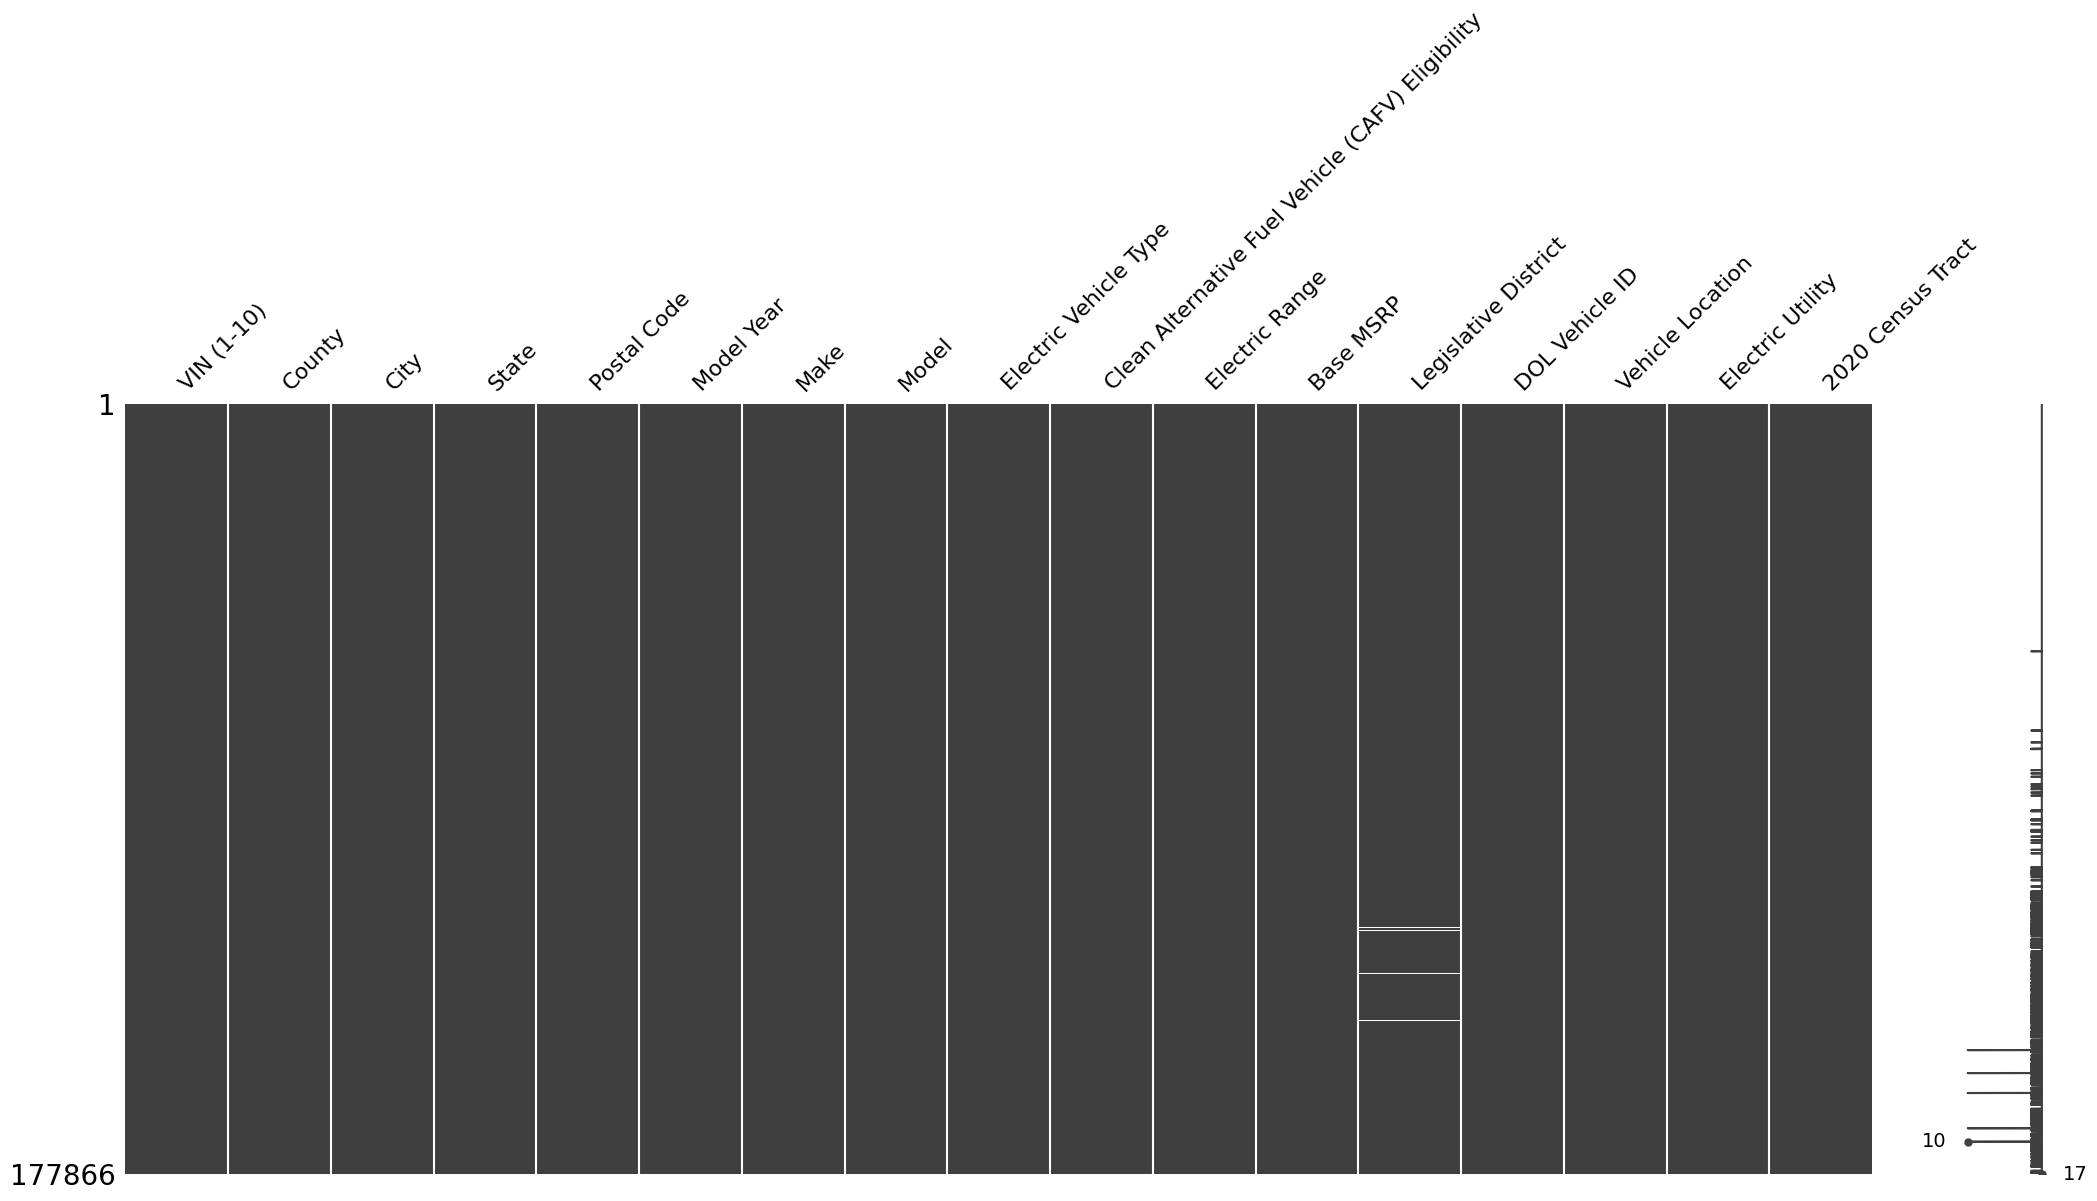

In [5]:
# Visualizar valores faltando utilizando missingno.
msno.matrix(df);

In [6]:
# Dropando os valores ausentes.
df = df.dropna()

In [7]:
# Converta a coluna 'Localização do Veículo' para o tipo string
df['Vehicle Location'] = df['Vehicle Location'].astype(str)

# Extraia a latitude e a longitude da coluna 'Localização do Veículo
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

df['latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
df['longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

df = df.dropna(subset=['latitude', 'longitude'])

## Engenharia de Atributos: Criando uma Coluna 'Localização'

Em nosso conjunto de dados, temos três colunas que representam diferentes níveis de divisões geográficas: Condado, Cidade e Estado. Para criar uma representação mais informativa e combinada desses atributos geográficos, vamos criar uma nova coluna chamada Localização.

A coluna Localização será uma concatenação das colunas Condado, Cidade e Estado, com cada valor separado por uma vírgula. Por exemplo, se uma linha tiver os valores "Yakima" para Condado, "Yakima" para Cidade e "WA" para Estado, o valor correspondente da coluna Localização será "Yakima, Yakima, WA".

In [8]:
df['Location'] = df['County'] + ', ' + df['City'] + ', ' + df['State']

# Engenharia de Atributos: Criando uma Coluna Price_Range_Category

Em nosso conjunto de dados, observamos uma distribuição incomum dos valores na coluna Base MSRP, com um grande número de veículos apresentando o valor 0. Isso pode indicar valores ausentes ou desconhecidos no conjunto de dados. Para lidar com essa incerteza e ainda aproveitar os dados disponíveis, decidimos criar uma nova coluna chamada Price_Range_Category com base nos valores da Base MSRP.

Definimos quatro categorias para a coluna Price_Range_Category:

**"Unknown"**: Se o valor da Base MSRP for 0, atribuímos essa categoria, pois pode indicar valores ausentes ou desconhecidos.

**"Low"**: Se o valor da Base MSRP for inferior a 40.000, atribuiremos esta categoria.

**"Medium"**: Se o valor da Base MSRP estiver entre 40.000 e 60.000, atribuiremos esta categoria.

**"High"**: Se o valor da Base MSRP for superior a 60.000, atribuiremos esta categoria.

Ao criar essa nova coluna, podemos entender melhor a distribuição dos preços dos veículos elétricos em nosso conjunto de dados e levar em conta a incerteza potencial introduzida pelo grande número de valores 0 na coluna Base MSRP.

In [9]:
df['Base MSRP'].value_counts()

,count
Base MSRP,
0,174142
69900,1366
31950,381
52900,222
32250,136
59900,127
54950,126
39995,111
36900,104


In [10]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Unknown"
        elif price < 40000:
            return "Low"
        elif price < 60000:
            return "Medium"
        else:
            return "High"

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

df = create_price_range_category(df, column='Base MSRP')


# **Engenharia de Atributos: Criando uma Coluna 'Electric_Range_Category'**

Em nosso conjunto de dados, observamos uma distribuição incomum dos valores na coluna 'Electric Range', com um grande número de veículos apresentando o valor 0. Isso pode indicar valores ausentes ou desconhecidos no conjunto de dados. Para lidar com essa incerteza e ainda aproveitar os dados disponíveis, decidimos criar uma nova coluna chamada 'Electric_Range_Category' com base nos valores da 'Electric Range'.

Definimos quatro categorias para a coluna 'Electric_Range_Category':

**"Unknown"**: Se o valor da 'Electric Range' for 0, atribuiremos essa categoria, pois pode indicar valores ausentes ou desconhecidos.

**"Short"**: Se o valor da 'Electric Range' for inferior a 150, atribuiremos esta categoria.

**"Medium"**: Se o valor da 'Electric Range' estiver entre 150 e 300, atribuiremos esta categoria.

**"Long"**: Se o valor da 'Electric Range' for superior a 300, atribuiremos esta categoria.

Ao criar essa nova coluna, podemos entender melhor a distribuição dos alcances dos veículos elétricos em nosso conjunto de dados e levar em conta a incerteza potencial introduzida pelo grande número de valores 0 na coluna 'Electric Range'.

In [11]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

In [12]:
# Exibindo o DataFrame limpo e com atributos criados.
display(df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude,Location,Price_Range_Category,Electric_Range_Category
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.308390,47.610365,"King, Seattle, WA",Unknown,Medium
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,-122.179458,47.802589,"Snohomish, Bothell, WA",Unknown,Unknown
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.348480,47.632405,"King, Seattle, WA",Unknown,Medium
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.036460,47.534065,"King, Issaquah, WA",Unknown,Medium
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10,-122.557170,47.733415,"Kitsap, Suquamish, WA",Unknown,Unknown


Análise Exploratória de Dados

Nesta seção, realizaremos uma análise exploratória de dados (EDA) no conjunto de dados dos carros elétricos. O objetivo da EDA é obter insights e compreensão sobre o conjunto de dados, identificar padrões, relacionamentos e anomalias. Através da EDA, podemos tomar decisões informadas sobre como pré-processar e modelar os dados, bem como gerar hipóteses para análises futuras.

Para o nosso conjunto de dados de carros elétricos, vamos focar nas seguintes colunas:

- Location

- Model Year

- Make

- Model

- Electric Vehicle Type

- Clean Alternative Fuel Vehicle (CAFV) Eligibility

- Electric Range Category

- Price Range Category

- Electric Utility

Começaremos examinando a distribuição dos dados nas várias colunas, como o número de carros elétricos por cidade ou condado, a distribuição de marcas e modelos, e a distribuição dos tipos de veículos elétricos. Também visualizaremos a distribuição geográfica dos carros elétricos utilizando as colunas 'Condado', 'Cidade' e 'Estado'.

Em seguida, exploraremos os relacionamentos entre as variáveis, como a relação entre o alcance elétrico e o preço base (MSRP) dos veículos elétricos. Analisaremos também a distribuição da elegibilidade para veículos de combustível alternativo limpo (CAFV) entre diferentes marcas, modelos e tipos de veículos elétricos.

Além disso, investigaremos as tendências na adoção de carros elétricos ao longo do tempo, com foco na coluna 'Ano do Modelo'. Identificaremos padrões e mudanças significativas na popularidade de diversas marcas e modelos de veículos elétricos, bem como quaisquer tendências relacionadas aos tipos de veículos elétricos e elegibilidade para CAFV.

Por fim, examinaremos quaisquer outliers ou anomalias no conjunto de dados que possam justificar uma investigação mais profunda. Ao longo do processo de EDA, visualizaremos nossos achados utilizando diversas bibliotecas de gráficos, como Seaborn e Plotly, para comunicar os insights de maneira eficaz.

Ao final da EDA, teremos uma compreensão abrangente do conjunto de dados dos carros elétricos, o que nos permitirá tomar decisões informadas sobre como proceder com o pré-processamento, engenharia de atributos e modelagem, além de orientar nossas hipóteses para análises futuras.





In [13]:
def plot_value_counts(df, column, top_n=None):
    # Obter a contagem de valores para a coluna especificada
    value_counts = df[column].value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    # Configurar os subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Criar o gráfico de pizza
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Porcentagem de {column}', fontsize=14)

    # Criar o gráfico de barras
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Contagem de {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Contagem')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)

    # Definir o título geral para a figura
    fig.suptitle(f'Distribuição de {column}', fontsize=18, y=1.03)

    # Exibir os gráficos
    plt.show()

def plot_coordinates_seaborn(df, cmap_column=None, top_n=None, figsize=(15, 10)):
    # Remover pares duplicados de latitude e longitude
    unique_coordinates = df[['latitude', 'longitude']].drop_duplicates()

    if cmap_column and top_n:
        # Incluir a coluna cmap_column no DataFrame unique_coordinates
        unique_coordinates[cmap_column] = df[cmap_column]

        # Obter as N categorias mais frequentes na coluna especificada
        top_categories = unique_coordinates[cmap_column].value_counts().head(top_n).index.tolist()

        # Filtrar o DataFrame unique_coordinates para manter apenas as N categorias principais
        filtered_coordinates = unique_coordinates[unique_coordinates[cmap_column].isin(top_categories)]

        # Criar um gráfico de dispersão usando Seaborn com o parâmetro hue
        plt.figure(figsize=figsize)
        sns.scatterplot(data=filtered_coordinates, x='longitude', y='latitude', hue=cmap_column, palette='viridis', edgecolor=None, s=50)
        plt.title(f'Pontos de Latitude e Longitude (Top {top_n} {cmap_column})')
    else:
        # Criar um gráfico de dispersão usando Seaborn sem o parâmetro hue
        plt.figure(figsize=figsize)
        sns.scatterplot(data=unique_coordinates, x='longitude', y='latitude', color='darkcyan', edgecolor=None, s=50)
        plt.title('Pontos de Latitude e Longitude')

    # Exibir o gráfico
    plt.show()


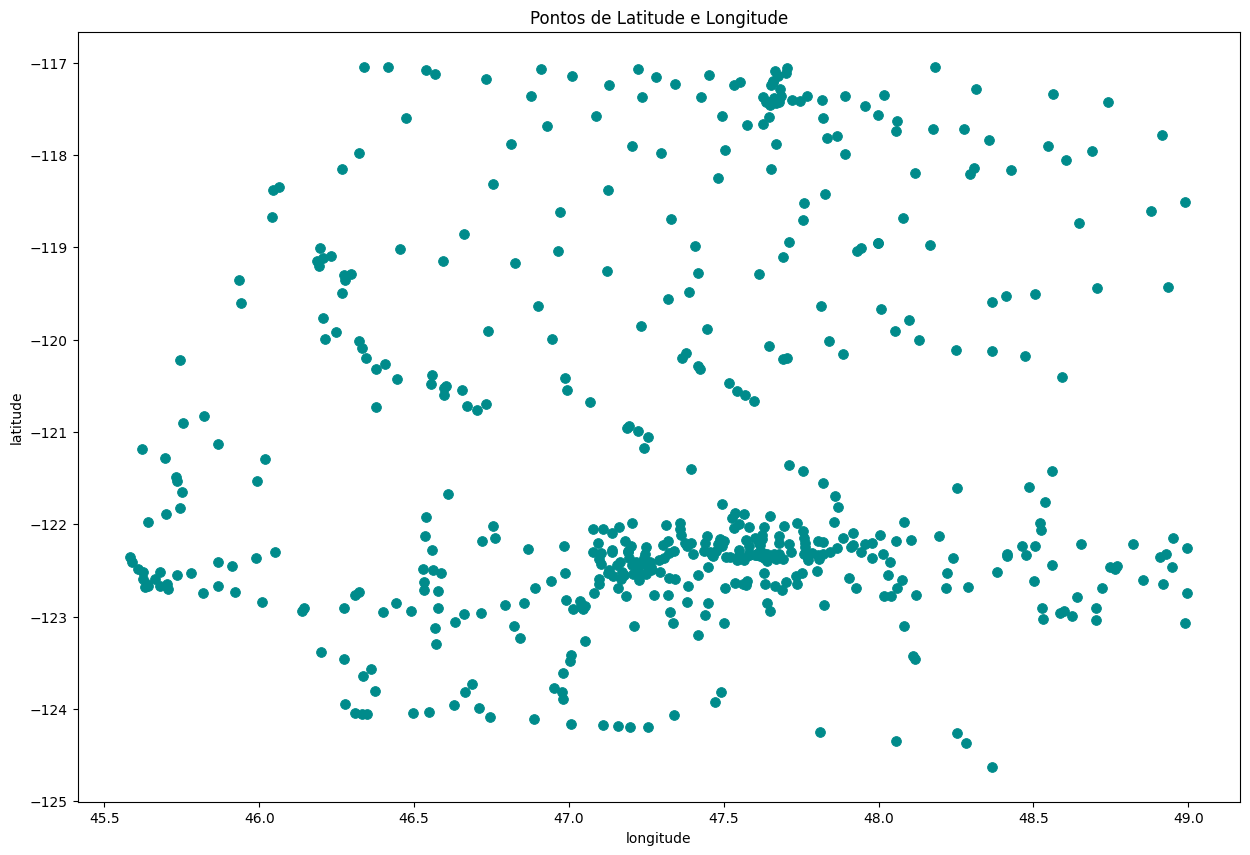

In [14]:
plot_coordinates_seaborn(df)  # Localizações geográficas padrão sem nenhuma modificação


# **Análise do Conjunto de Dados de Carros Elétricos: Localização**

A coluna 'Location' no conjunto de dados de Carros Elétricos fornece informações sobre a localização dos carros elétricos. A seguir, estão as contagens de valores da coluna 'Location':

Location	Count

King, Seattle, WA |	21942

King, Bellevue, WA |	6476

King, Redmond, WA	| 4641

Clark, Vancouver, WA |	4462

King, Kirkland, WA | 3920

King, Sammamish, WA	| 3650

King, Renton, WA	| 3112

Snohomish, Bothell, WA	| 3014

Thurston, Olympia, WA	| 3014

Pierce, Tacoma, WA | 2651

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


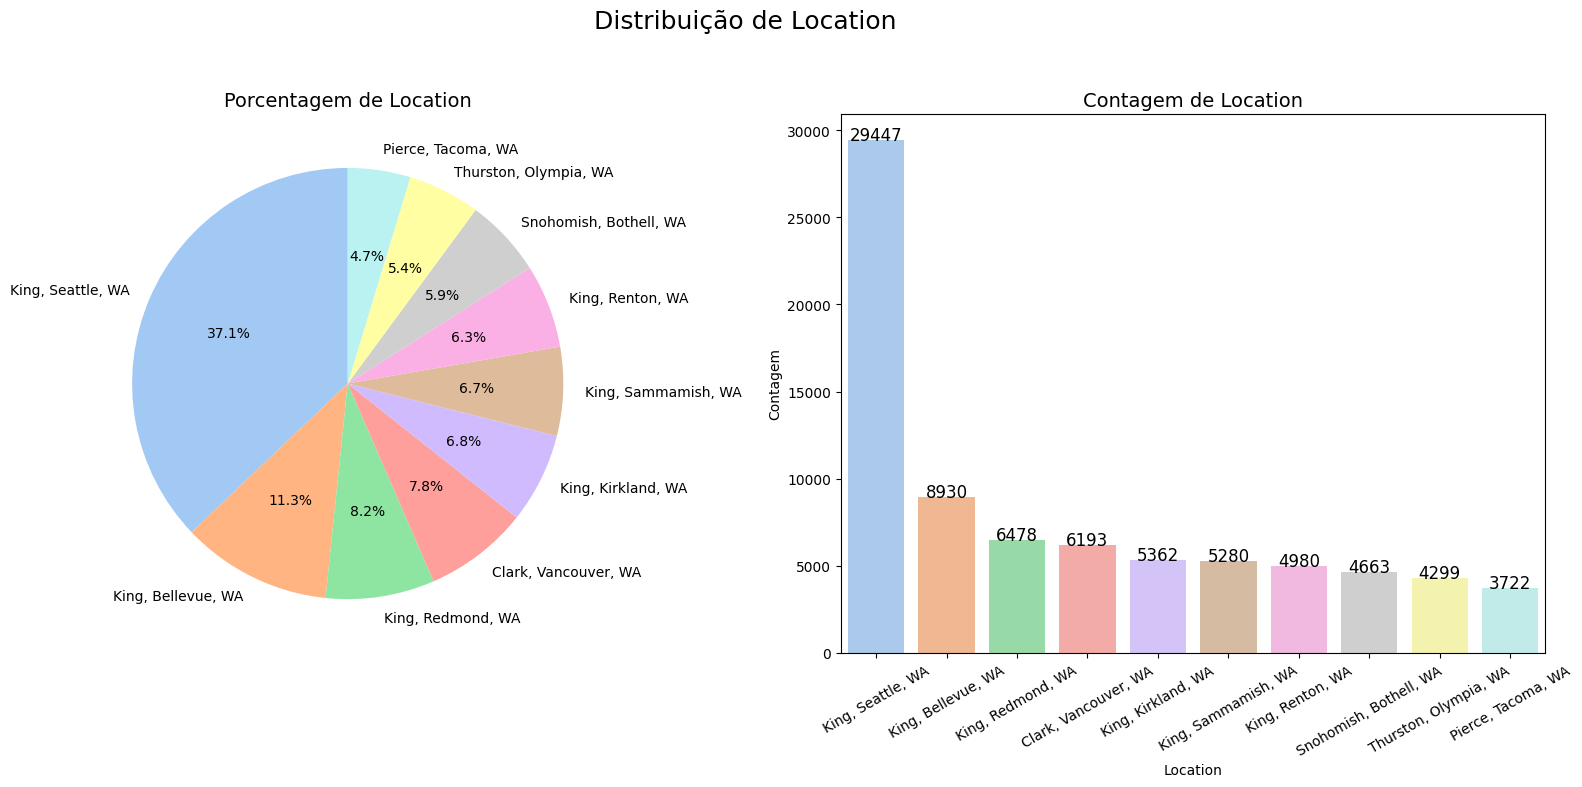

In [15]:
plot_value_counts(df, 'Location', top_n=10)


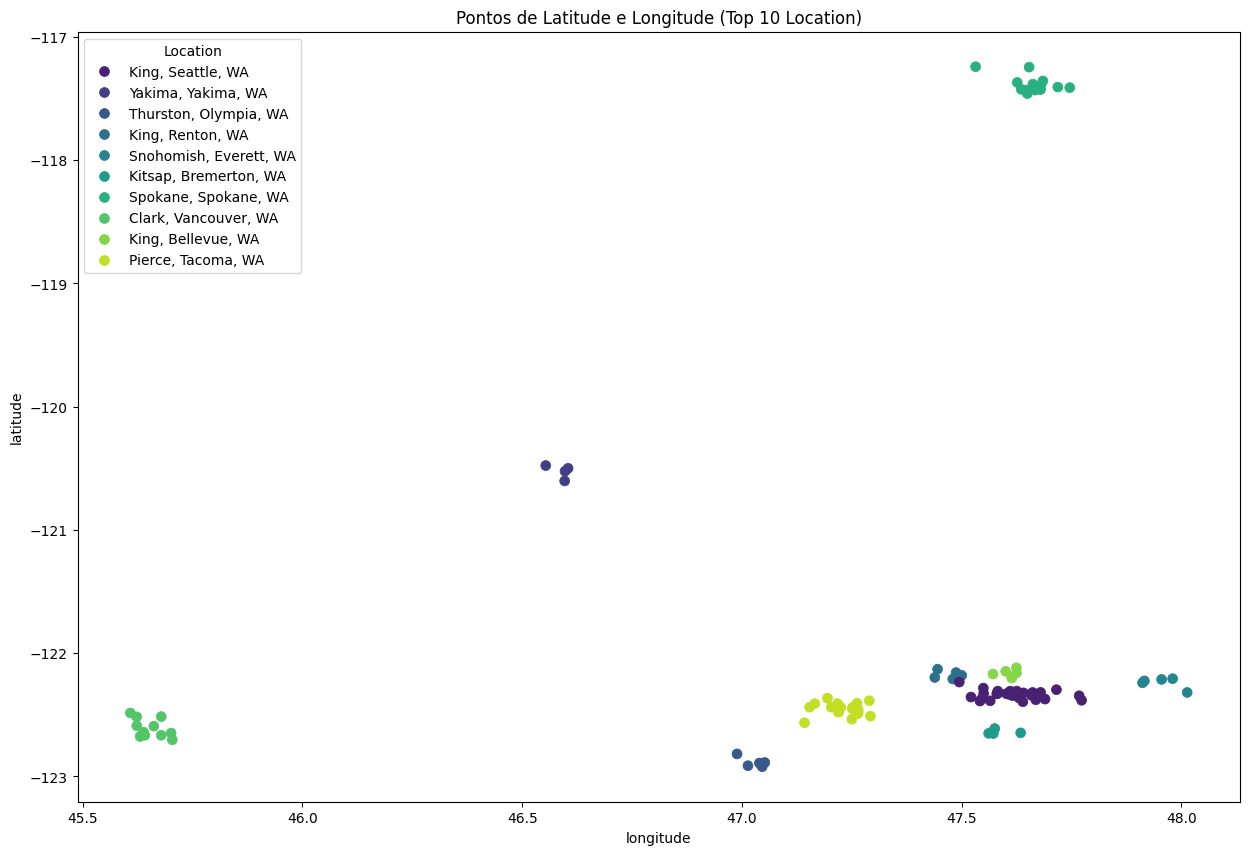

In [16]:
plot_coordinates_seaborn(df, cmap_column='Location', top_n=10)


**Inferências e Insights**

A partir das contagens de valores acima, podemos fazer as seguintes inferências e obter insights:

- Os 10 carros elétricos mais comuns no conjunto de dados estão localizados principalmente no estado de Washington (WA), sem carros de outros estados.
- O maior número de carros elétricos está localizado no condado de King, com Seattle tendo a maior contagem de 21.942 carros. Isso indica que a maioria dos carros elétricos está concentrada em áreas urbanas, particularmente em grandes cidades como Seattle e Bellevue.
- A segunda localização mais comum é o condado de Clark, com Vancouver tendo uma contagem de 4.462 carros.
  
Com base na análise, as seguintes recomendações podem ser feitas para as campanhas de promoção de carros elétricos:

- **Focar em áreas urbanas**: Como a maioria dos carros elétricos está localizada em áreas urbanas, as campanhas de promoção de carros elétricos devem se concentrar em promover o uso de carros elétricos nas cidades, especialmente em grandes cidades como Seattle e Bellevue.
  
- **Expandir para outros condados**: Embora os condados de King e Clark tenham o maior número de carros elétricos, ainda há potencial para expandir o uso de carros elétricos em outros condados do estado de Washington. As campanhas devem considerar alcançar esses condados e promover os benefícios dos carros elétricos.
  
- **Focar em cidades específicas**: Dentro dos condados com um grande número de carros elétricos, pode haver cidades ou bairros específicos com taxas de adoção mais baixas. As campanhas devem focar nessas áreas e promover o uso de carros elétricos por meio de marketing direcionado e esforços de conscientização.

A tradução de "Electric Car Dataset Analysis: CAFV Eligibility" para o português é:

**Análise do Conjunto de Dados de Carros Elétricos: Elegibilidade CAFV**

A coluna 'CAFV Eligibility' no conjunto de dados de Carros Elétricos fornece informações sobre se um determinado carro elétrico é elegível para incentivos de Clean Alternative Fuel Vehicle (CAFV) com base no seu alcance de bateria. A seguir, estão as contagens de valores da coluna 'CAFV Eligibility':

| **CAFV Eligibility** | **count** |
|------------------------|--------------|
| Elegível para Veículo de Combustível Alternativo Limpo | 59.092 |
| Elegibilidade desconhecida, pois o alcance da bateria não foi pesquisado | 49.346 |
| Não elegível devido ao baixo alcance da bateria | 15.600 |

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


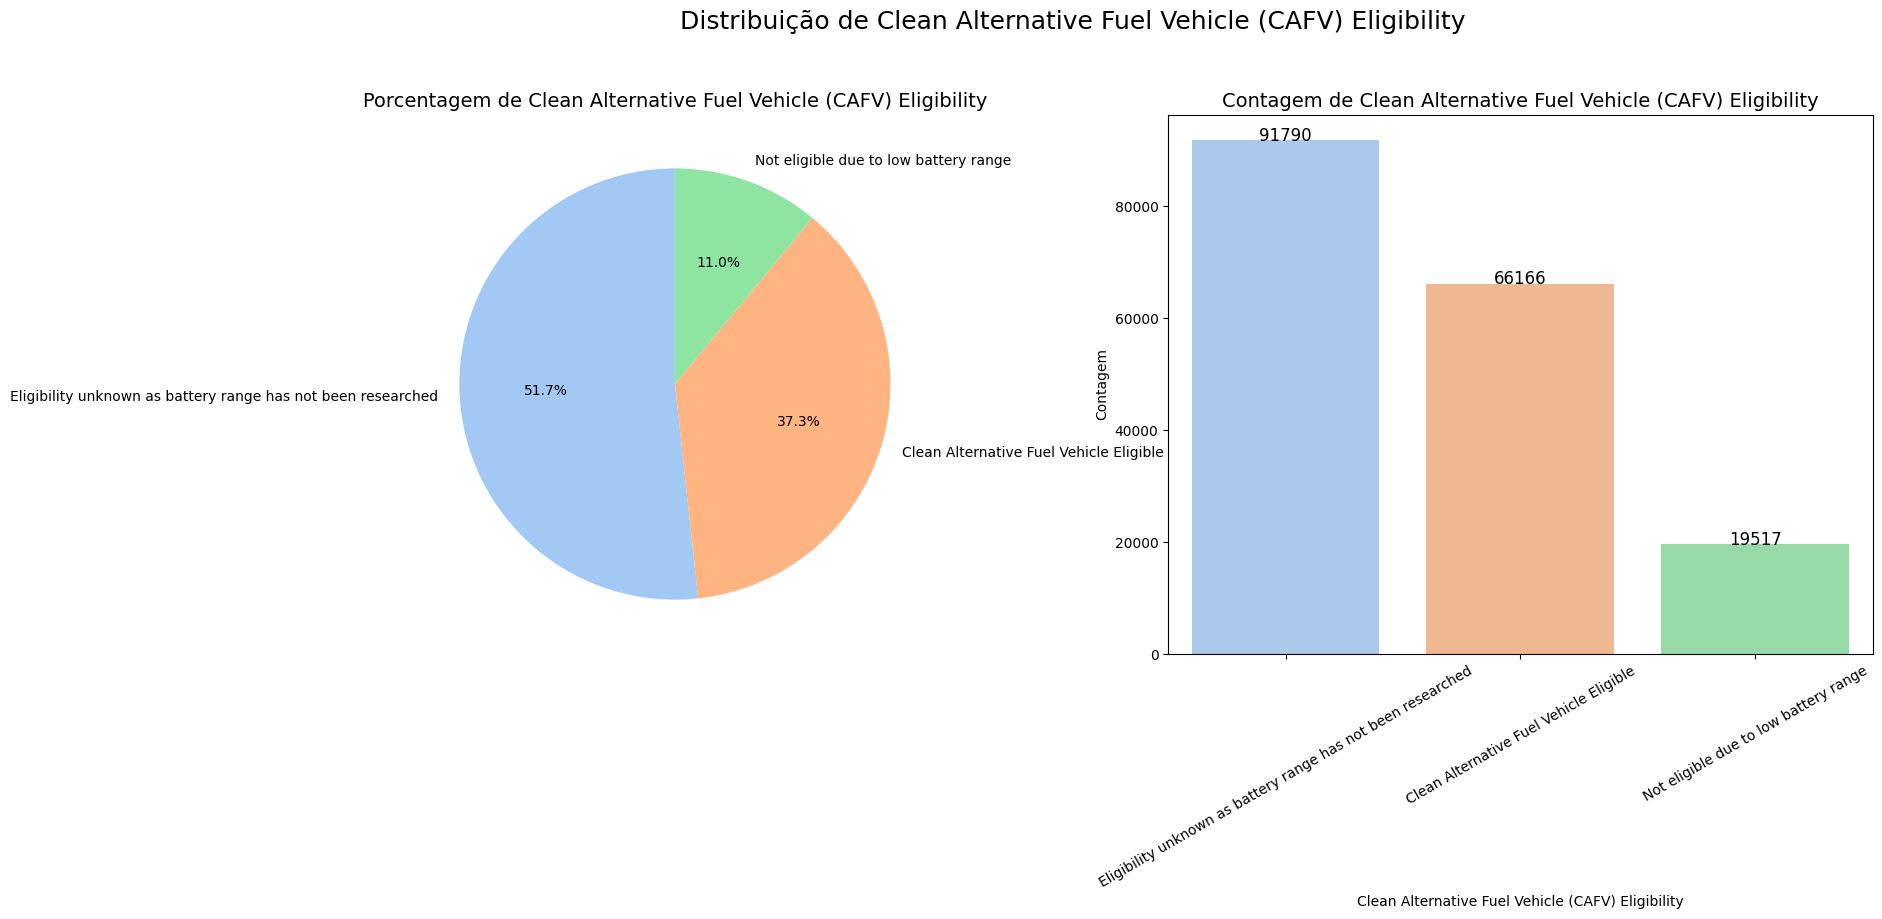

In [17]:
plot_value_counts(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', top_n=3)


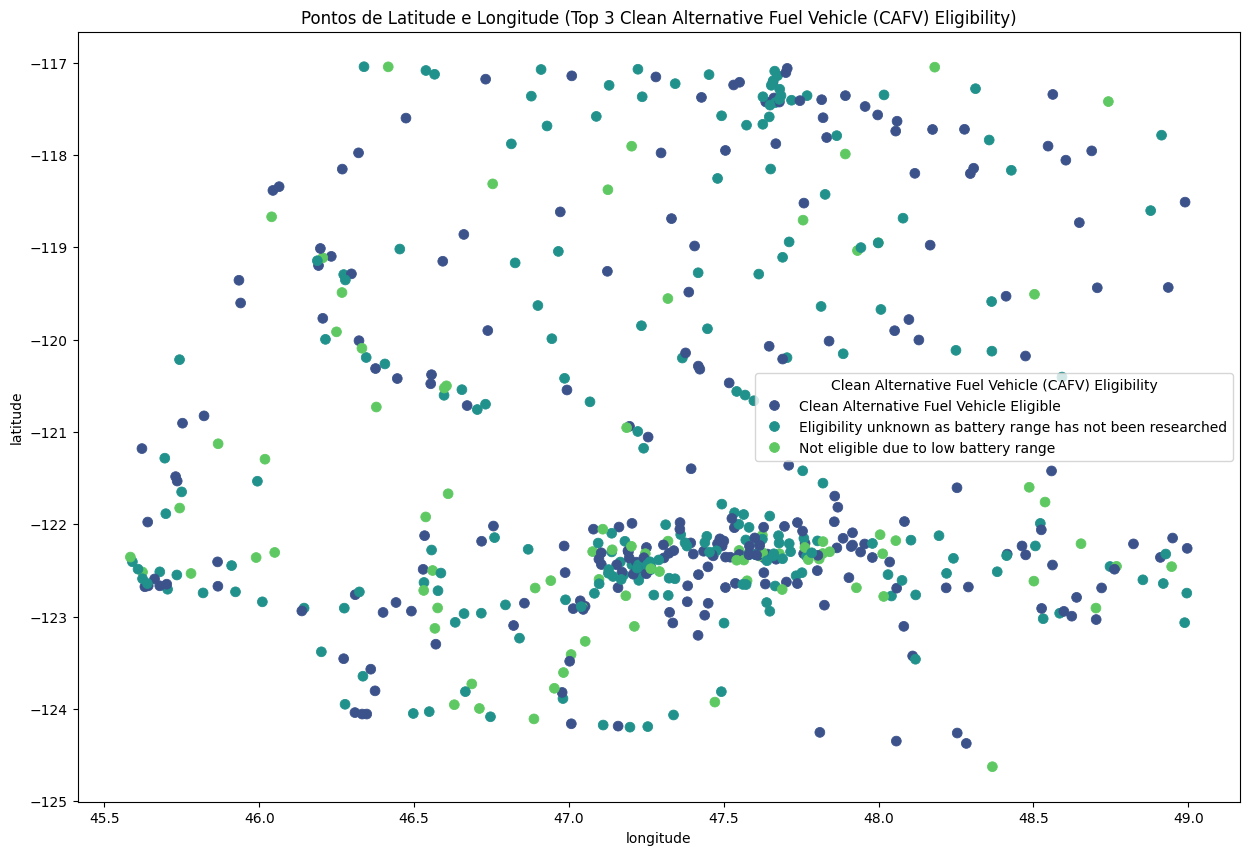

In [18]:
plot_coordinates_seaborn(df, cmap_column='Clean Alternative Fuel Vehicle (CAFV) Eligibility', top_n=3)

Os veículos elétricos (VEs) estão ganhando popularidade como uma alternativa sustentável e ambientalmente amigável aos veículos tradicionais com motores de combustão interna. Como o setor de transporte é um dos principais contribuintes para as emissões de gases de efeito estufa, a adoção de veículos elétricos pode desempenhar um papel crucial na redução da pegada de carbono geral. Analisar os dados disponíveis sobre veículos elétricos pode fornecer insights valiosos e ajudar a informar as estratégias futuras para promover a adoção desses veículos.

Com base nas contagens de valores fornecidas para o conjunto de dados de carros elétricos, podemos fazer algumas inferências e fornecer as seguintes recomendações:

- **Promover veículos de combustível alternativo limpo**: Uma parte significativa (cerca de 47,5%) dos veículos no conjunto de dados são classificados como "Elegíveis para Veículo de Combustível Alternativo Limpo". Isso indica que há um crescente interesse e adoção de veículos elétricos. Devem ser feitos esforços para incentivar o uso de veículos de combustível alternativo limpo, oferecendo incentivos, melhorando a infraestrutura e educando os consumidores sobre os benefícios ambientais e financeiros de possuir esses veículos.

- **Pesquisa e coleta de dados sobre o alcance da bateria**: Há um número significativo de veículos (cerca de 39,8%) com "Elegibilidade desconhecida, pois o alcance da bateria não foi pesquisado". Para melhorar a compreensão do mercado de veículos elétricos, é essencial coletar e analisar dados sobre o alcance da bateria para todos os veículos elétricos. Isso ajudará a fazer melhores recomendações para os consumidores e também ajudará no desenvolvimento de políticas e regulamentações relacionadas aos veículos elétricos.

- **Melhorar a tecnologia da bateria**: Cerca de 12,7% dos veículos são "Não elegíveis devido ao baixo alcance da bateria". Isso indica que ainda há espaço para melhorias na tecnologia das baterias. Investir em pesquisa e desenvolvimento para aprimorar o desempenho das baterias não só ajudará a aumentar o alcance dos veículos elétricos, mas também melhorará sua eficiência geral e atratividade para potenciais compradores.

- **Expandir a infraestrutura de recarga**: Uma barreira significativa para a adoção de veículos elétricos é a falta de infraestrutura de recarga. Expandir a disponibilidade de estações de recarga, especialmente em áreas urbanas e de alto tráfego, tornará os veículos elétricos mais acessíveis e convenientes para os usuários.

- **Aumentar a conscientização pública**: É crucial criar consciência sobre os benefícios dos veículos elétricos e das opções de combustível alternativo limpo. Campanhas públicas, programas educacionais e parcerias com comunidades locais podem ajudar a promover a adoção de veículos elétricos e a reduzir a pegada de carbono geral.

A tradução de **"Electric Car Dataset Analysis: Make"** para o português é:

**Análise do Conjunto de Dados de Carros Elétricos: Fabricante**

A coluna 'Fabricante' no conjunto de dados de Carros Elétricos fornece informações sobre os 10 principais fabricantes de carros elétricos. A seguir, estão as contagens de valores da coluna 'Fabricante':

| **Fabricante** | **Contagem** |
|----------------|--------------|
| TESLA          | 56.906       |
| NISSAN         | 12.912       |
| CHEVROLET      | 10.797       |
| FORD           | 6.635        |
| BMW            | 5.556        |
| KIA            | 4.831        |
| TOYOTA         | 4.631        |
| VOLKSWAGEN     | 3.356        |
| AUDI           | 2.472        |
| VOLVO          | 2.324        |

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


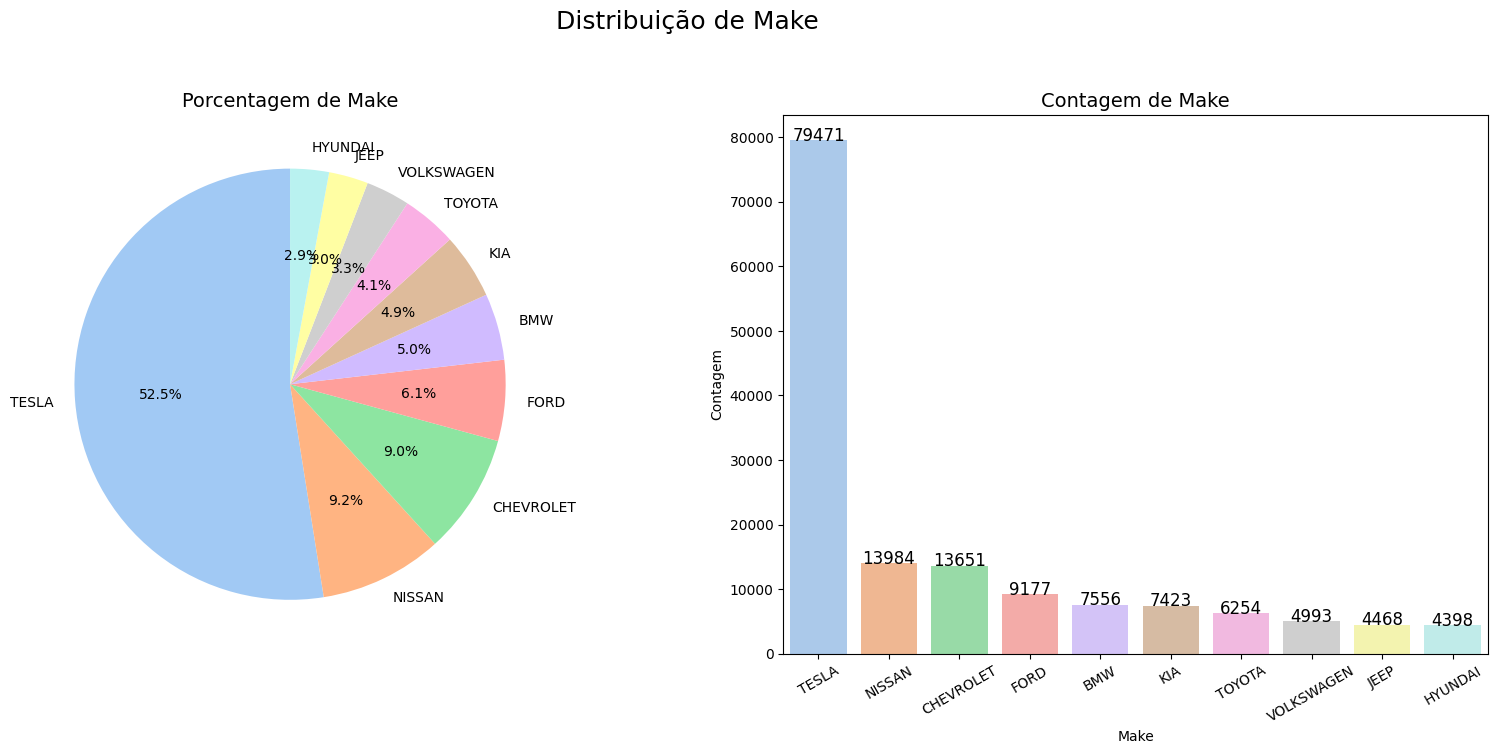

In [19]:
plot_value_counts(df, 'Make', top_n=10)

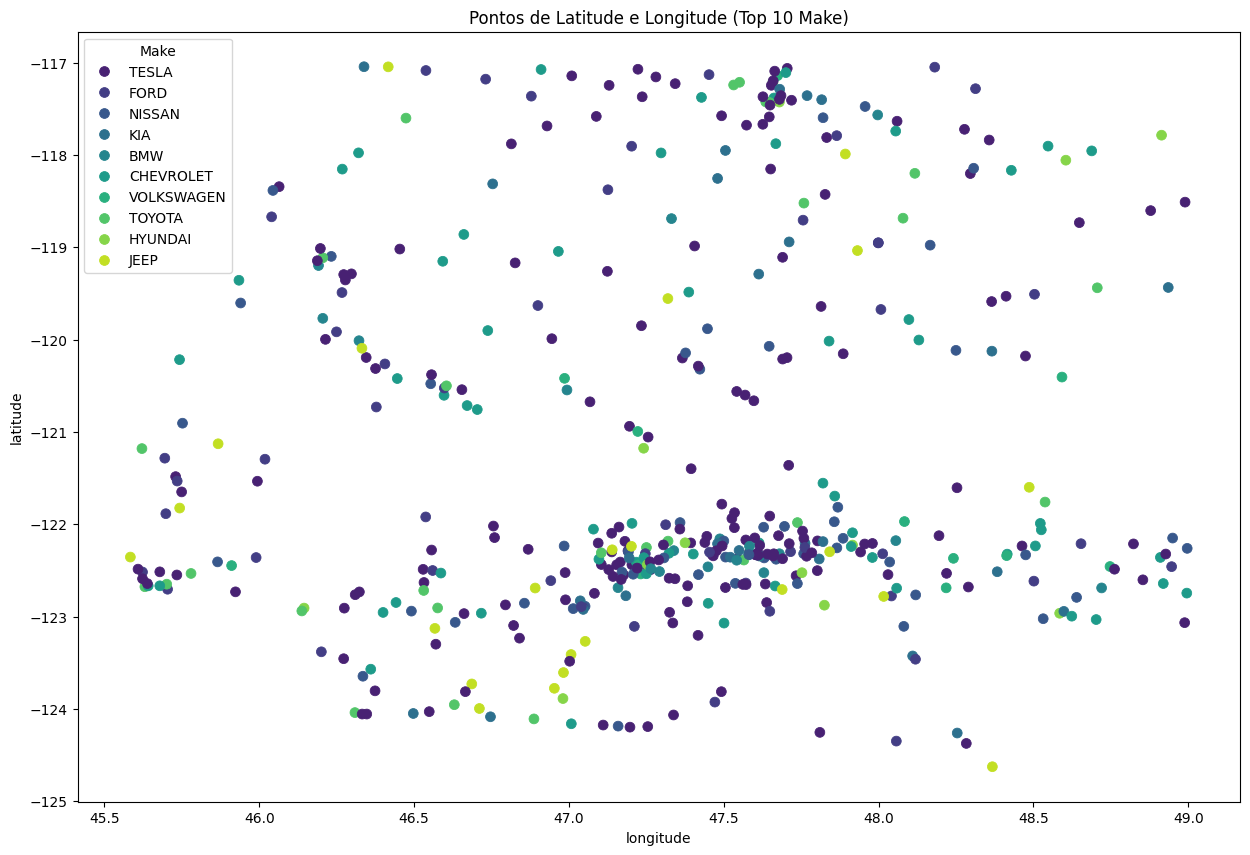

In [20]:
plot_coordinates_seaborn(df, cmap_column='Make', top_n=10)

**Inferências e Insights**

A partir das contagens de valores acima, podemos fazer as seguintes inferências e obter insights:

- A maioria dos carros elétricos no conjunto de dados é da marca Tesla, com 56.906 carros pertencentes a essa categoria.
- As marcas mais comuns a seguir são Nissan e Chevrolet, com 12.912 e 10.797 carros, respectivamente.
- As demais marcas possuem contagens relativamente menores, com a Volvo tendo a menor contagem, com 2.324 carros.

Com base na análise, as seguintes recomendações podem ser feitas para as campanhas de promoção de carros elétricos:

- **Promover carros elétricos da Tesla**: Como a maioria dos carros elétricos no conjunto de dados é da marca Tesla, as campanhas de promoção de carros elétricos devem se concentrar em promover os carros elétricos da Tesla para incentivar mais pessoas a comprá-los.

- **Incentivar a diversidade de marcas**: Embora a Tesla seja a marca dominante no conjunto de dados, há outras marcas com um número significativo de carros. As campanhas de promoção de carros elétricos devem incentivar a diversidade de marcas e promover os benefícios de cada marca para incentivar mais pessoas a comprar carros elétricos.

- **Advogar pela maior disponibilidade de marcas menos comuns**: As campanhas de promoção de carros elétricos devem advogar pela maior disponibilidade de marcas menos comuns, como Volvo e Audi, para aumentar a escolha do consumidor e promover a diversidade no mercado de carros elétricos.

------------------------------------------------------------------

**Análise do Conjunto de Dados de Carros Elétricos: Modelo**

A coluna 'Modelo' no conjunto de dados de Carros Elétricos fornece informações sobre os 10 principais modelos de carros elétricos. A seguir, estão as contagens de valores da coluna 'Modelo':

| **Modelo**        | **Contagem** |
|-------------------|--------------|
| MODEL 3           | 24.300       |
| MODEL Y           | 20.609       |
| LEAF              | 12.890       |
| MODEL S           | 7.314        |
| BOLT EV           | 4.974        |
| VOLT              | 4.864        |
| MODEL X           | 4.634        |
| PRIUS PRIME       | 2.421        |
| ID.4              | 2.318        |
| NIRO              | 2.286        |

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


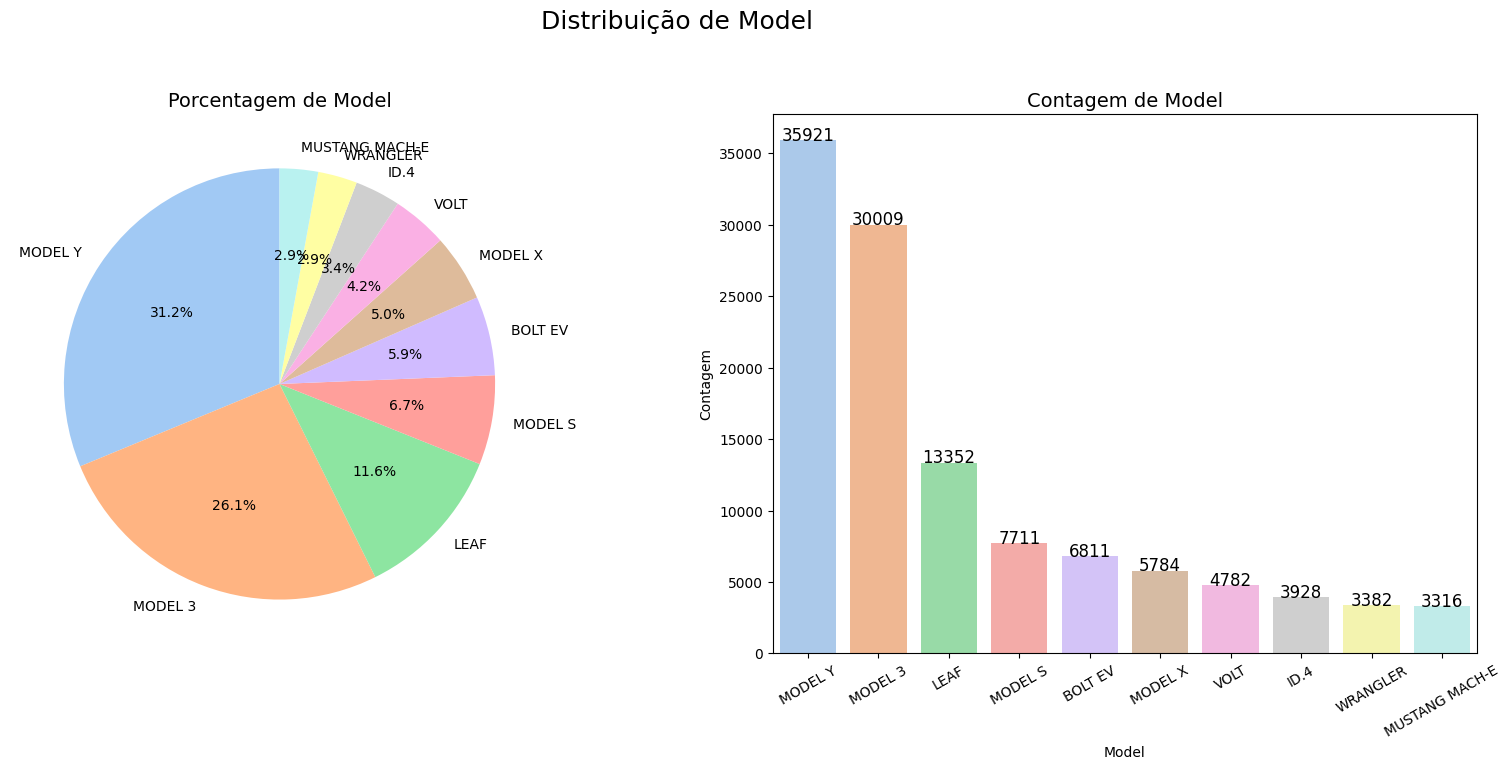

In [21]:
plot_value_counts(df, 'Model', top_n=10)


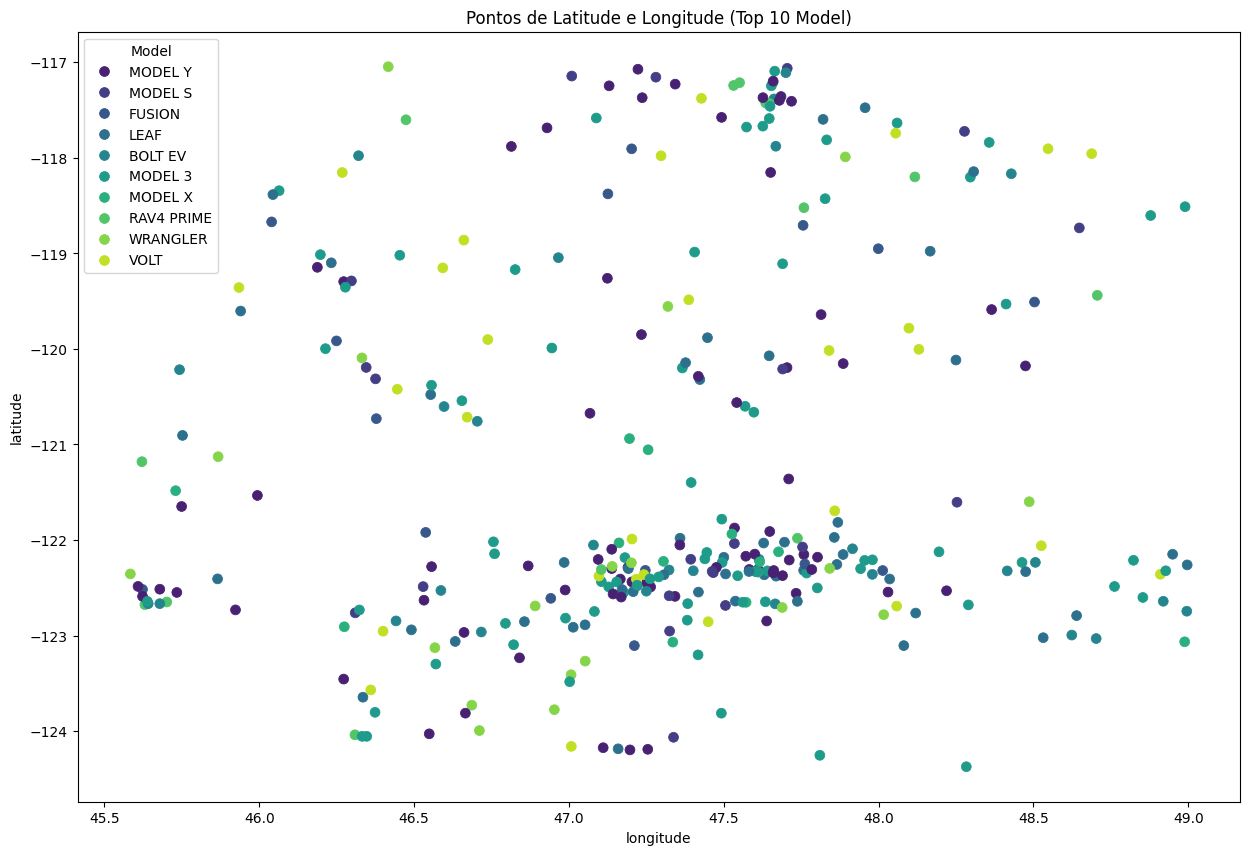

In [22]:
plot_coordinates_seaborn(df, cmap_column='Model', top_n=10)

**Inferências e Insights**

A partir das contagens de valores acima, podemos fazer as seguintes inferências e obter insights:

- O modelo de carro elétrico mais comum no conjunto de dados é o Tesla Model 3, com 24.300 carros pertencentes a essa categoria.
- O segundo modelo mais comum é o Tesla Model Y, com 20.609 carros.
- O Nissan Leaf é o terceiro modelo mais comum, com 12.890 carros.
- Os modelos restantes possuem contagens relativamente menores, com o Kia Niro tendo a menor contagem, com 2.286 carros.

Com base na análise, as seguintes recomendações podem ser feitas para as campanhas de promoção de carros elétricos:

- **Promover modelos populares**: Como os modelos mais comuns no conjunto de dados são o Tesla Model 3 e o Model Y, as campanhas de promoção de carros elétricos devem se concentrar em promover esses modelos para incentivar mais pessoas a comprá-los.

- **Incentivar a diversidade de modelos**: Embora os modelos mais comuns sejam dominados pela Tesla e pela Nissan, existem outros modelos com um número significativo de carros. As campanhas de promoção de carros elétricos devem incentivar a diversidade de modelos e promover os benefícios de cada modelo para incentivar mais pessoas a comprar carros elétricos.

- **Advogar pela maior disponibilidade de modelos menos comuns**: As campanhas de promoção de carros elétricos devem advogar pela maior disponibilidade de modelos menos comuns, como o VW ID.4 e o Kia Niro, para aumentar a escolha do consumidor e promover a diversidade no mercado de carros elétricos.

---

**Análise do Conjunto de Dados de Carros Elétricos: Tipo de Veículo Elétrico**

A coluna 'Tipo de Veículo Elétrico' no conjunto de dados de Carros Elétricos fornece informações sobre o tipo de veículo elétrico. A seguir, estão as contagens de valores da coluna 'Tipo de Veículo Elétrico':

| **Tipo de Veículo Elétrico**                     | **Contagem** |
|--------------------------------------------------|--------------|
| Veículo Elétrico a Bateria (BEV)                 | 95.753       |
| Veículo Elétrico Híbrido Plug-in (PHEV)          | 28.285       |

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


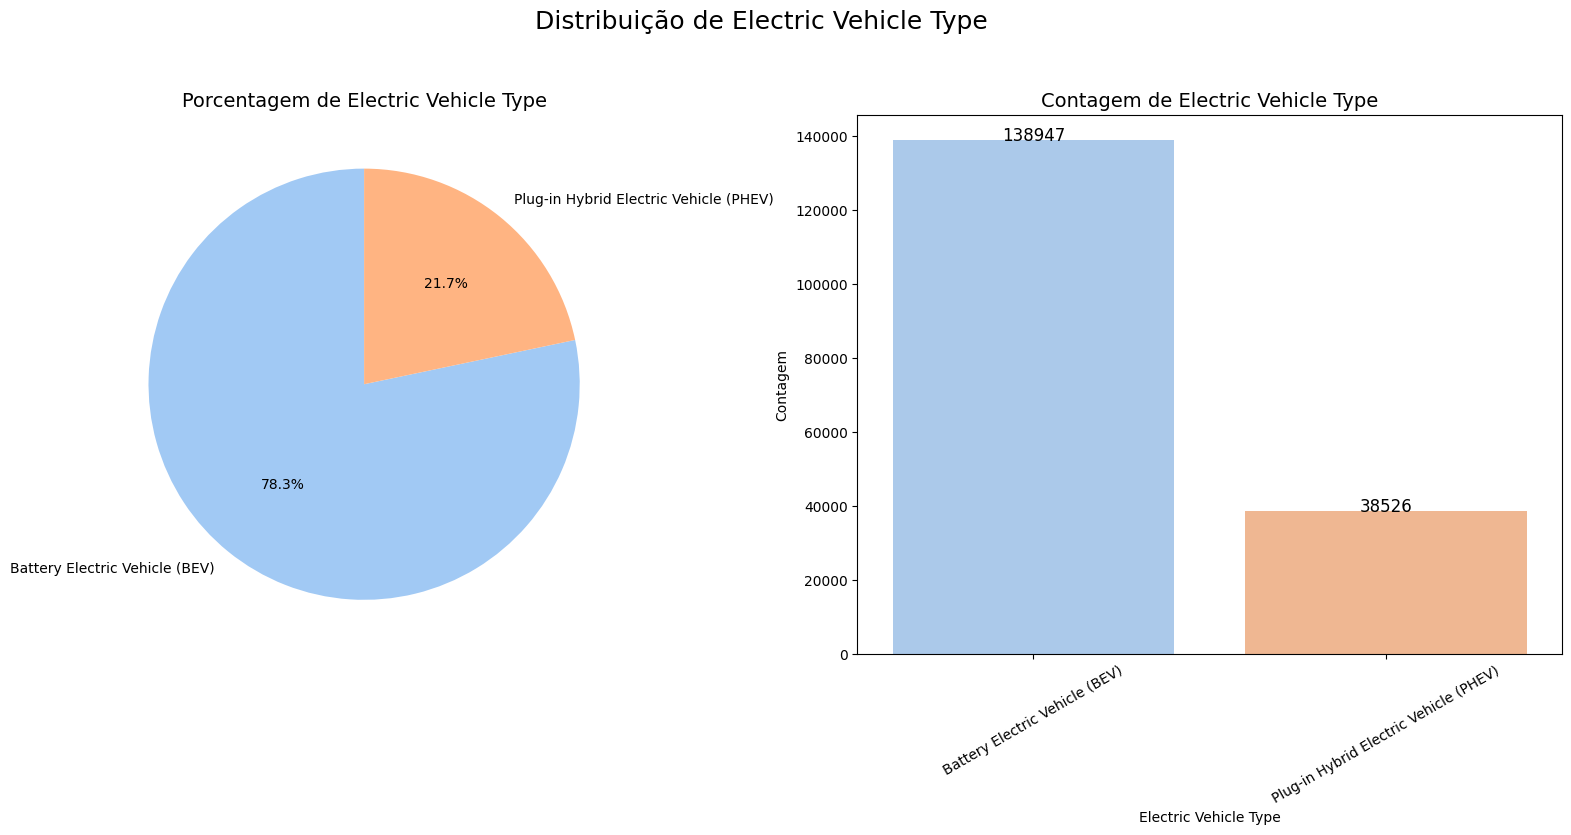

In [23]:
plot_value_counts(df, 'Electric Vehicle Type', top_n=2)


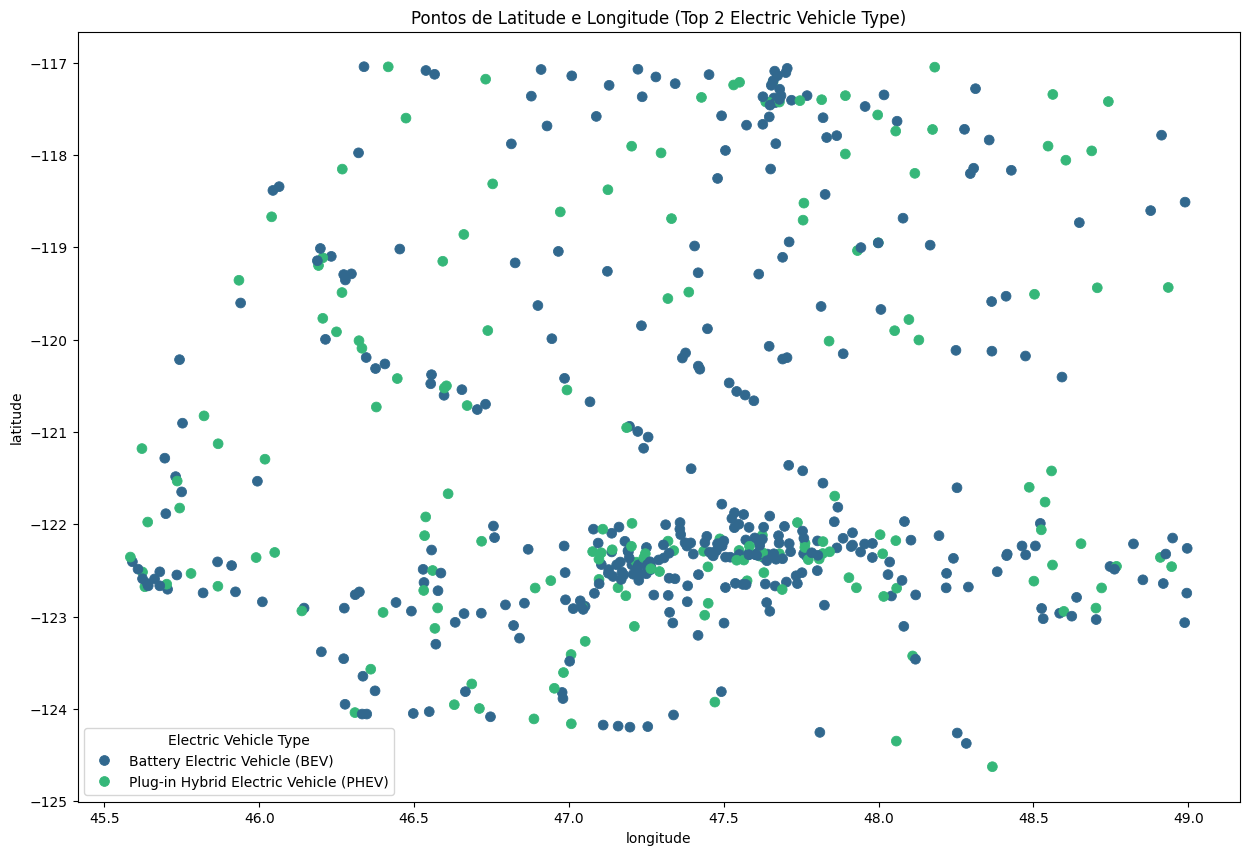

In [24]:
plot_coordinates_seaborn(df, cmap_column='Electric Vehicle Type', top_n=2)

**Inferências e Insights**  
A partir das contagens de valores acima, podemos fazer as seguintes inferências e obter insights:

- Os veículos elétricos a bateria são o tipo mais comum de veículo elétrico no conjunto de dados, com 95.753 carros nesta categoria.
- O segundo tipo mais comum são os veículos elétricos híbridos plug-in, com 28.285 carros.
- Não há outros tipos de veículos elétricos no conjunto de dados, indicando que a maioria dos carros elétricos são BEVs ou PHEVs.

**Recomendações para Defensores de Veículos Elétricos**  
Com base na análise, as seguintes recomendações podem ser feitas para as advocacias de carros elétricos:

- **Promover os benefícios dos BEVs e PHEVs:** Como os BEVs e PHEVs são os tipos mais comuns de veículos elétricos no conjunto de dados, as advocacias de carros elétricos devem focar em promover os benefícios desses tipos de veículos para incentivar mais pessoas a adquiri-los.

- **Educar sobre as diferenças entre BEVs e PHEVs:** Embora ambos os tipos de veículos elétricos sejam comuns, eles possuem características diferentes e são adequados para diferentes casos de uso. As advocacias de carros elétricos devem educar os consumidores sobre as diferenças entre BEVs e PHEVs, para ajudá-los a tomar decisões de compra informadas.

- **Advogar por maior disponibilidade de diferentes tipos de veículos elétricos:** Embora BEVs e PHEVs sejam comuns, existem outros tipos de veículos elétricos, como os veículos elétricos a célula de combustível (FCEVs), que não estão representados no conjunto de dados. As advocacias de carros elétricos devem advogar por uma maior disponibilidade de diferentes tipos de veículos elétricos para aumentar a escolha do consumidor e promover a diversidade no mercado de carros elétricos.

--------------------------------------------------------------------------------

**Análise do Conjunto de Dados de Carros Elétricos: Categoria de Faixa de Preço**  
A coluna 'Categoria de Faixa de Preço' no conjunto de dados de carros elétricos fornece informações sobre a faixa de preço dos carros elétricos. A seguir, estão as contagens de valores da coluna 'Categoria de Faixa de Preço':

| Categoria de Faixa de Preço | Contagem |
|-----------------------------|----------|
| Desconhecido                | 120.656  |
| Alta                        | 1.653    |
| Baixa                       | 971      |
| Média                       | 758      |

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


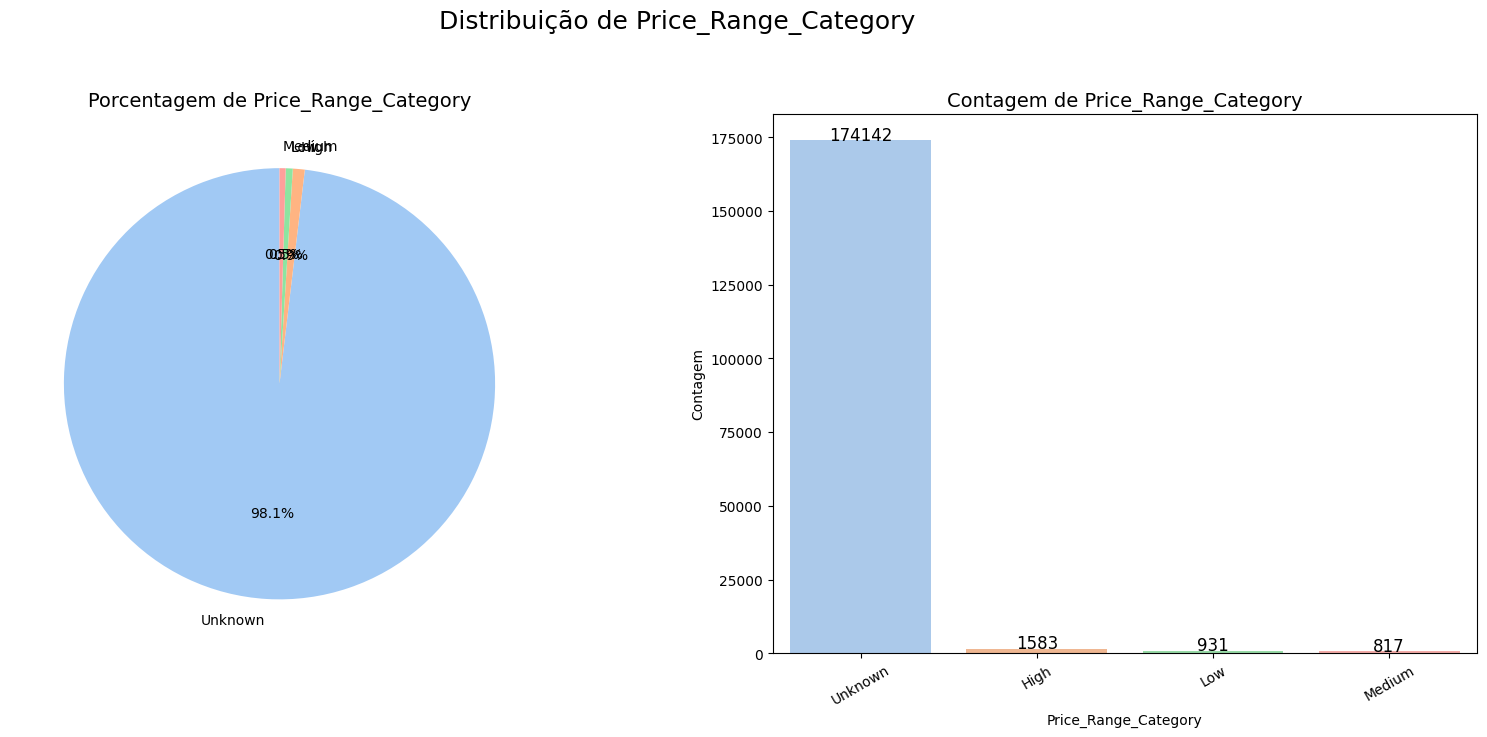

In [25]:
plot_value_counts(df, 'Price_Range_Category', top_n=4)


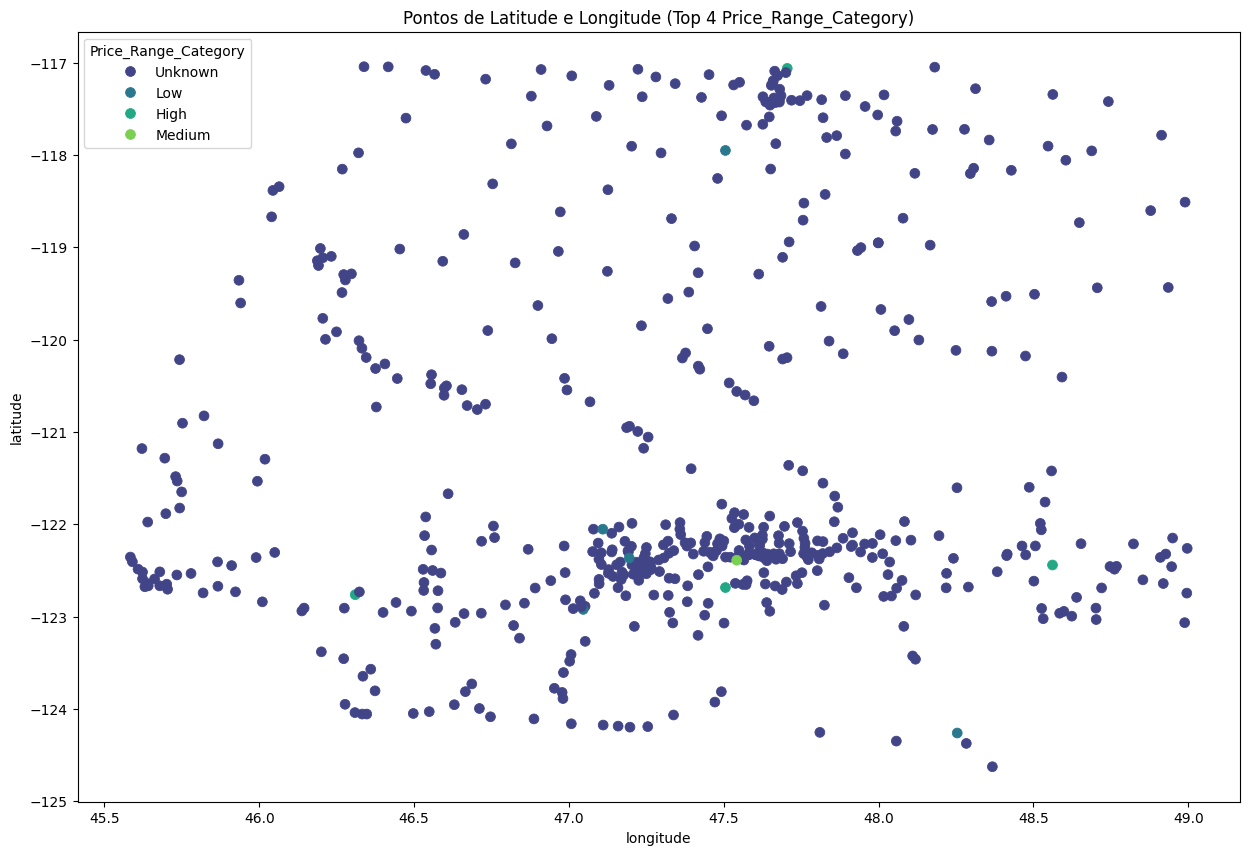

In [26]:
plot_coordinates_seaborn(df, cmap_column='Price_Range_Category', top_n=4)


**Inferências e Insights**  
A partir das contagens de valores acima, podemos fazer as seguintes inferências e obter insights:

- A maioria dos carros elétricos no conjunto de dados possui uma categoria de faixa de preço desconhecida, com 120.656 carros nesta categoria. Isso provavelmente se deve ao grande número de veículos que possuem o valor 0 na coluna 'Preço Base' (Base MSRP).
- Apenas uma pequena porcentagem de carros elétricos tem uma categoria de faixa de preço definida, com 1.653 carros na categoria 'Alta', 971 carros na categoria 'Baixa' e 758 carros na categoria 'Média'.
- As categorias de faixa de preço são definidas com base nos valores de 'Preço Base', sendo que um valor de 0 indica uma faixa de preço desconhecida.

**Recomendações para Defensores de Carros Elétricos**  
Com base na análise, as seguintes recomendações podem ser feitas para as advocacias de carros elétricos:

- **Incentivar mais transparência nos preços:** Como a maioria dos carros elétricos no conjunto de dados possui uma categoria de faixa de preço desconhecida, as advocacias de carros elétricos devem incentivar mais transparência nos preços para ajudar os consumidores a tomar decisões de compra informadas.

- **Focar em opções acessíveis:** Como apenas uma pequena porcentagem de carros elétricos possui uma categoria de faixa de preço definida, e eles se encontram nas categorias 'Baixa' e 'Média', as advocacias de carros elétricos devem focar na promoção de opções acessíveis para tornar os carros elétricos mais acessíveis a uma gama mais ampla de consumidores.

- **Advogar por mais incentivos:** Dado que os carros elétricos tendem a ser mais caros do que os carros movidos a gasolina, as advocacias de carros elétricos devem advogar por mais incentivos e subsídios para tornar os carros elétricos mais acessíveis e promover sua adoção.

**Análise do Conjunto de Dados de Carros Elétricos: Utilitário Elétrico**  
A coluna 'Utilitário Elétrico' no conjunto de dados de carros elétricos fornece informações sobre as empresas de utilidade elétrica que fornecem energia para os carros elétricos. A seguir, estão as contagens de valores da coluna 'Utilitário Elétrico':

| Utilitário Elétrico | Contagem |
|---------------------|----------|
| PUGET SOUND ENERGY INC - CITY OF TACOMA - (WA) | 44.926 |
| PUGET SOUND ENERGY INC | 24.626 |
| CITY OF SEATTLE - (WA) - CITY OF TACOMA - (WA) | 23.254 |
| BONNEVILLE POWER ADMINISTRATION - PUD NO 1 OF CLARK COUNTY - (WA) | 7.223 |
| BONNEVILLE POWER ADMINISTRATION - CITY OF TACOMA - (WA) - PENINSULA LIGHT COMPANY | 5.600 |
| PUGET SOUND ENERGY INC - PUD NO 1 OF WHATCOM COUNTY | 2.917 |
| BONNEVILLE POWER ADMINISTRATION - AVISTA CORP - INLAND POWER & LIGHT COMPANY | 1.846 |
| BONNEVILLE POWER ADMINISTRATION - PUD 1 OF SNOHOMISH COUNTY | 1.124 |
| PACIFICORP | 938 |
| BONNEVILLE POWER ADMINISTRATION - PUD NO 1 OF BENTON COUNTY | 908 |

<ipython-input-13-d5672a32895f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


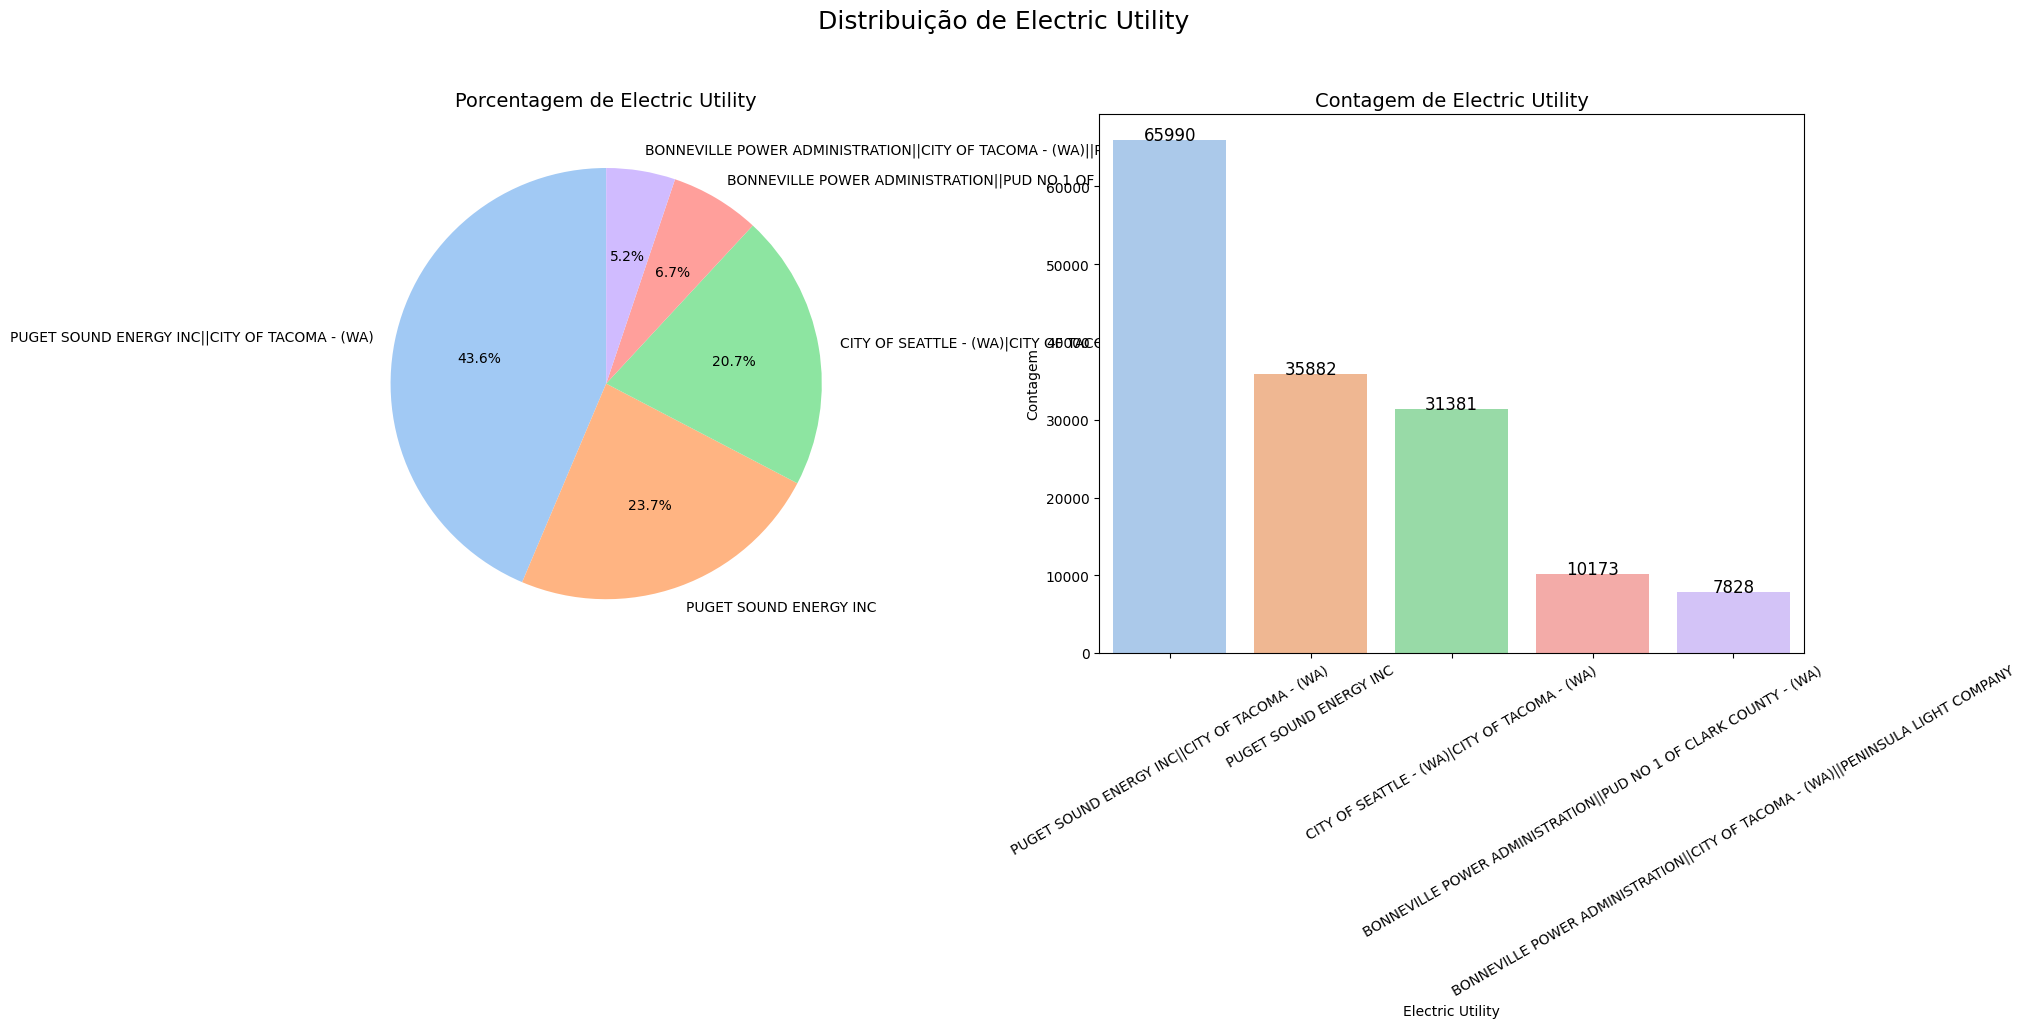

In [27]:
plot_value_counts(df, 'Electric Utility', top_n=5)


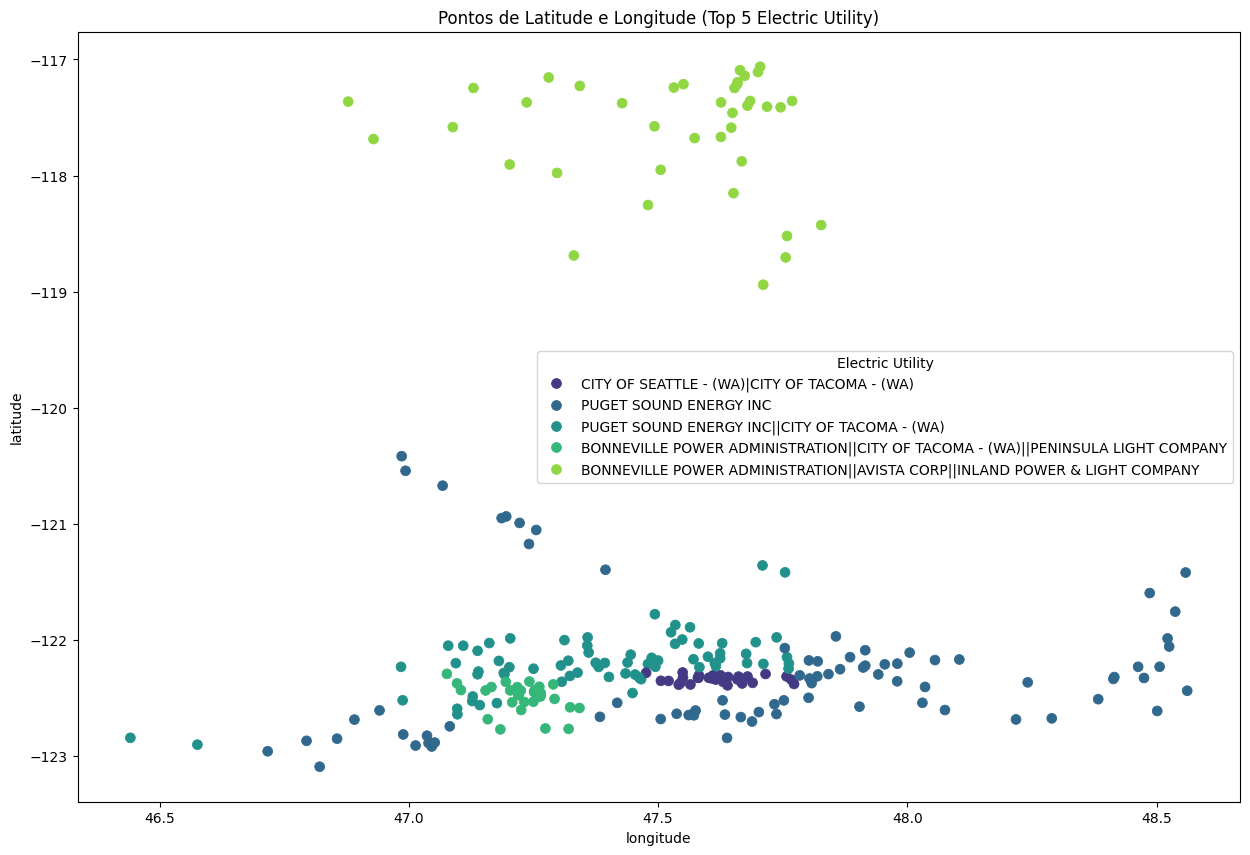

In [28]:
plot_coordinates_seaborn(df, cmap_column='Electric Utility', top_n=5)


**Inferências e Insights**  
A partir das contagens de valores acima, podemos fazer as seguintes inferências e obter insights:

- **Puget Sound Energy Inc.** é a empresa de utilidade elétrica mais comum no conjunto de dados, com 44.926 carros elétricos sendo alimentados por essa empresa.
- A segunda empresa de utilidade elétrica mais comum é **PUGET SOUND ENERGY INC** (24.626 carros), seguida pela **CITY OF SEATTLE** (23.254 carros).
- Existem várias outras empresas de utilidade elétrica no conjunto de dados, mas elas têm um número bem menor de carros elétricos alimentados por elas.

**Recomendações para Defensores de Carros Elétricos**  
Com base na análise, as seguintes recomendações podem ser feitas para as advocacias de carros elétricos:

- **Colaborar com empresas de utilidade elétrica:** Como os carros elétricos exigem uma rede elétrica confiável e eficiente para funcionar, as advocacias de carros elétricos devem colaborar com as empresas de utilidade elétrica para garantir que a infraestrutura necessária esteja em vigor para apoiar a adoção generalizada de carros elétricos.

- **Promover o uso de fontes de energia renovável:** Muitas empresas de utilidade elétrica estão se adaptando para utilizar fontes de energia renováveis, como energia eólica e solar. As advocacias de carros elétricos devem promover o uso dessas fontes de energia renovável para alimentar os carros elétricos, pois são mais sustentáveis e ambientalmente amigáveis.

- **Advogar por mais estações de carregamento:** Para apoiar a adoção generalizada de carros elétricos, é necessário que haja mais estações de carregamento disponíveis para os proprietários de carros elétricos. As advocacias de carros elétricos devem defender a construção de mais estações de carregamento em locais públicos, como estacionamentos e áreas de descanso, para tornar mais conveniente para os proprietários de carros elétricos carregarem seus veículos.